# KNN for Iris Flower Dataset

## About Dataset

### Context

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

### Content

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

### Acknowledgements

This dataset is free and is publicly available at the UCI Machine Learning Repository



In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report

In [84]:
url= "pca_iris.data"
pca_iris = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','target'])
df = pca_iris.copy()
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [85]:
df.shape

(150, 5)

In [86]:
df.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [87]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [89]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


- There are 4 independent varıables and 1 dependent variable in the dataset.
- There are 3 different uniqe values in the `Target`.
- Dataset doesn't have missing values.

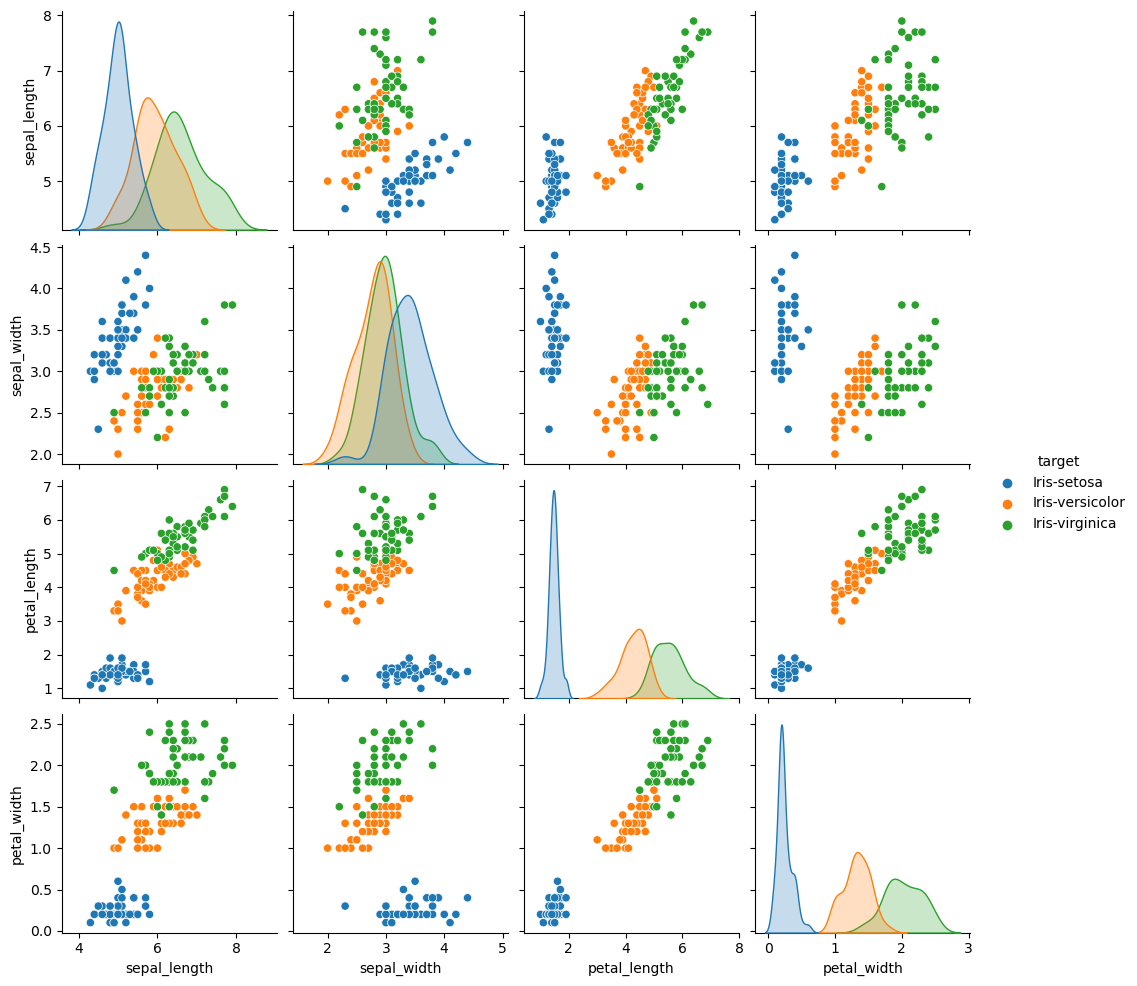

In [90]:
sns.pairplot(df, hue="target");

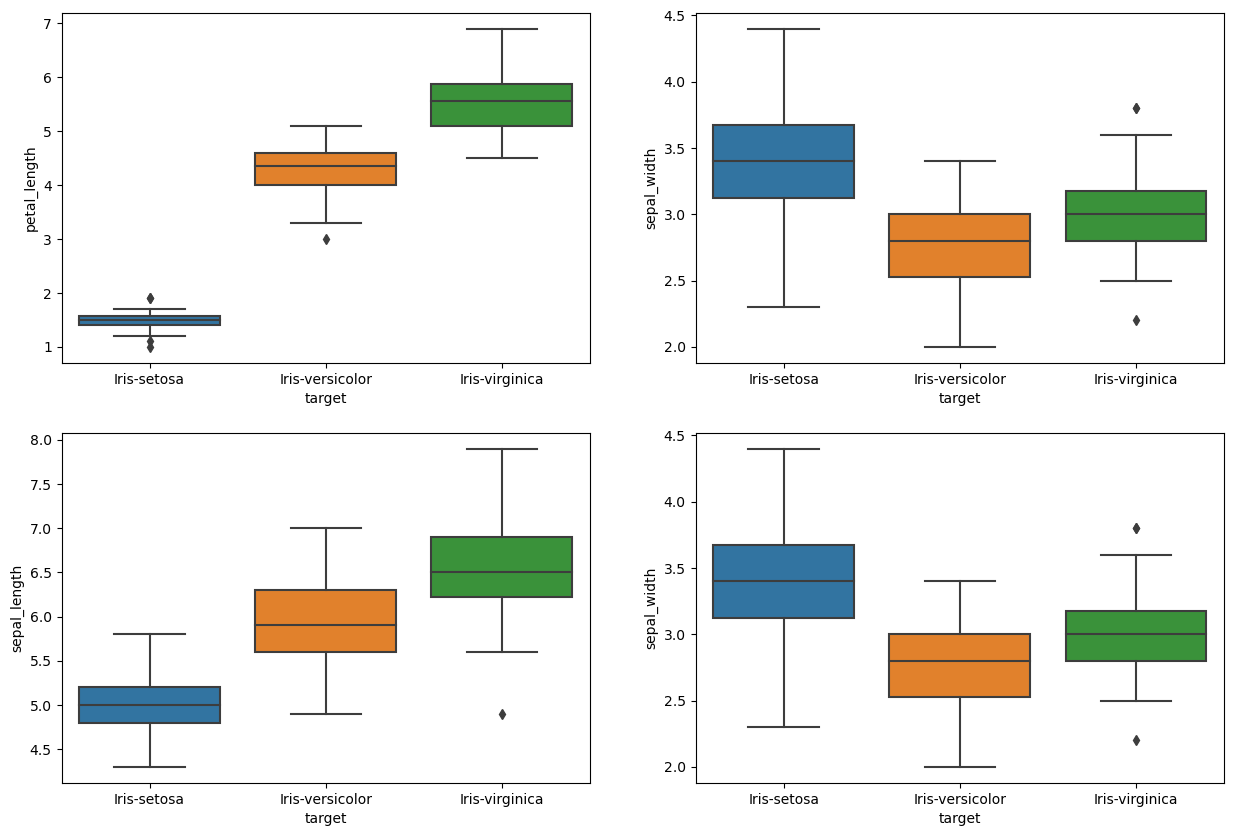

In [91]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x="target", y="petal_length", data=df)
plt.subplot(2,2,2)
sns.boxplot(x="target", y="sepal_width", data=df)
plt.subplot(2,2,3)
sns.boxplot(x='target',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='target',y='sepal_width',data=df);


## Model 

We will predection species with ML algoritm KNN from classification. Firstly we fit PCA and we will scale dataset. 

### Principal Component Analysis(PCA)

In [126]:
# Selected X and y 

X_pca = df.iloc[:,:4]
y = df.iloc[:,-1:]

In [127]:
# X calibrate standard scaler

X = StandardScaler().fit_transform(X_pca)

**P.S:** We want to induce from 4-dimision to 2-dimision. This is important as we doesn't induce from 4-features to 2-features. We will create  2 new columns.

In [128]:
#Create scaled new dataframe and this dataframe inculede new columns.

pca = PCA(n_components=2).fit_transform(X)
pca_df_X = pd.DataFrame(data = pca,columns = ['PC_1', 'PC_2'])
pca_DF_full = pd.concat([pca_df_X,df[["target"]]],axis=1)
pca_DF_full

,PC_1,PC_2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


In [141]:
#Spliting into the train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2
                                                  ,random_state=42)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (120, 4)
y_train: (120, 1)
X_test: (30, 4)
y_test: (30, 1)


### K-Nearest Neighbors Classification

In [169]:
#Create and fit the model

knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#

score = metrics.accuracy_score(y_pred, y_test) * 100
print(f"Accuracy with K-NN: {score:.2f}%\n")


Accuracy with K-NN: 100.00%



/Users/ozgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ozgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [162]:
# Classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



This report shows the `precision`, `recal`, and `precision` metrics for each classes, along with the `precision` values for eaeh classes. The report also includes the `precision` metric.

Since the correct classification rate for each class is quite high in this report, it can be concluded that the model performed well overall. Additionally, since the `weighted avg` and `weighted avg` metrics are also quite high, it can be seen that the model performed well on average among classes.
